In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## 1) Comparing Incident vs Transmitted continua

In [2]:
SED = np.loadtxt('continuum.cont', usecols=(0, 1, 2))
#input_SED = np.loadtxt('AGN_grid_input_sed.txt', usecols=(0, 1))

In [ ]:
SED_wavelength = SED[:,0]
SED_incident = SED[:,1]
SED_transmitted = SED[:,2]

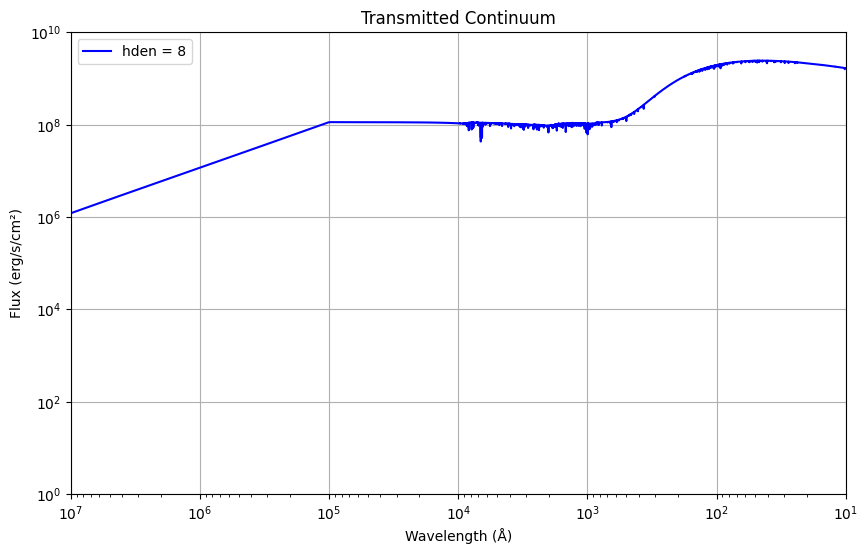

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(SED_wavelength, SED_transmitted,'-', label='hden = 8', color='b')


plt.gca().invert_xaxis()

plt.ylim(1,10**10)
plt.xlim(10**7,10**1)

plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (erg/s/cm²)')
plt.title('Transmitted Continuum')
plt.legend()

plt.grid(True)
plt.xscale('log')  
plt.yscale('log')  
plt.show()


In [4]:
print(SED_wavelength)
print(SED_incident)
print(SED_transmitted)

[2.99293e+11 2.98297e+11 2.97304e+11 ... 1.37660e-04 1.33601e-04
 1.29662e-04]
[      0.       0.       0. ... 3734000. 3660000. 3587000.]
[      0.       0.       0. ... 3726000. 3652000. 3580000.]


In [5]:
SED_hden8 = np.loadtxt('Sep_runs_hden8.cont', usecols=(2))
SED_hden9 = np.loadtxt('Sep_runs_hden9.cont', usecols=(2))
SED_hden10 = np.loadtxt('Sep_runs_hden10.cont', usecols=(2))
SED_hden11 = np.loadtxt('Sep_runs_hden11.cont', usecols=(2))
SED_wavelength1 = np.loadtxt('Sep_runs_hden8.cont', usecols=(0))

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(SED_wavelength1, SED_hden8,'-', label='hden = 8', color='b')
plt.plot(SED_wavelength1, SED_hden9,'-', label='hden = 9', color='r')
plt.plot(SED_wavelength1, SED_hden10,'-', label='hden = 10', color='g')
plt.plot(SED_wavelength1, SED_hden11,'-', label='hden = 11', color='y')


plt.gca().invert_xaxis()

plt.ylim(1,10**10)
plt.xlim(10**7,10**-3)

plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (erg/s/cm²)')
plt.title('Transmitted Continuum')
plt.legend()

plt.grid(True)
plt.xscale('log')  
plt.yscale('log')  
plt.show()


NameError: name 'SED_wavelength1' is not defined

<Figure size 1000x600 with 0 Axes>

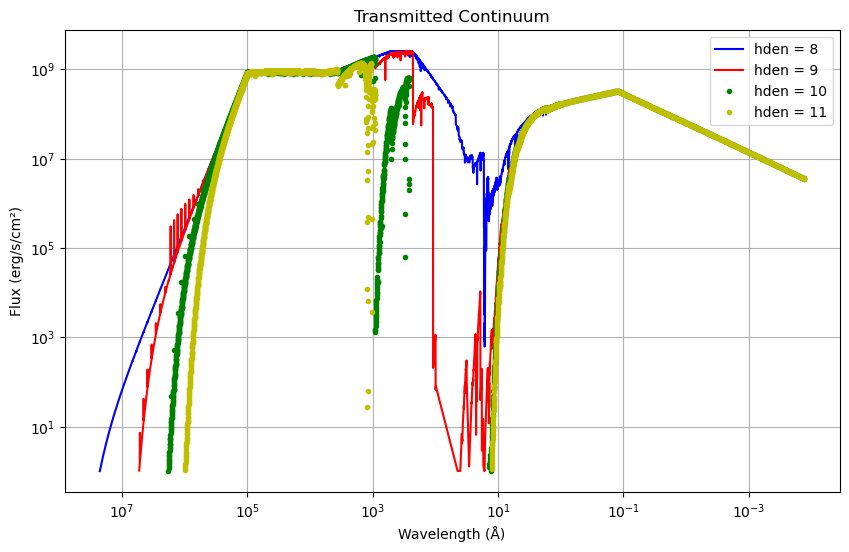

In [7]:
# Apply the mask for each SED dataset where values are greater than 1
mask_hden8 = SED_hden8 > 1
mask_hden9 = SED_hden9 > 1
mask_hden10 = SED_hden10 > 1
mask_hden11 = SED_hden11 > 1

# Apply the masks to both wavelength and flux data
filtered_wavelength8 = SED_wavelength1[mask_hden8]
filtered_hden8 = SED_hden8[mask_hden8]

filtered_wavelength9 = SED_wavelength1[mask_hden9]
filtered_hden9 = SED_hden9[mask_hden9]

filtered_wavelength10 = SED_wavelength1[mask_hden10]
filtered_hden10 = SED_hden10[mask_hden10]

filtered_wavelength11 = SED_wavelength1[mask_hden11]
filtered_hden11 = SED_hden11[mask_hden11]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_wavelength8, filtered_hden8, '-', label='hden = 8', color='b')
plt.plot(filtered_wavelength9, filtered_hden9, '-', label='hden = 9', color='r')
plt.plot(filtered_wavelength10, filtered_hden10, '.', label='hden = 10', color='g')
plt.plot(filtered_wavelength11, filtered_hden11, '.', label='hden = 11', color='y')

plt.gca().invert_xaxis()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (erg/s/cm²)')
plt.title('Transmitted Continuum')
plt.legend()

plt.grid(True)
plt.xscale('log')  
plt.yscale('log')  
plt.show()


In [8]:
stat_inci = np.loadtxt('inci.cont',usecols=(0,1))

en_inci = stat_inci[:,0]
nFn_inci = stat_inci[:,1]

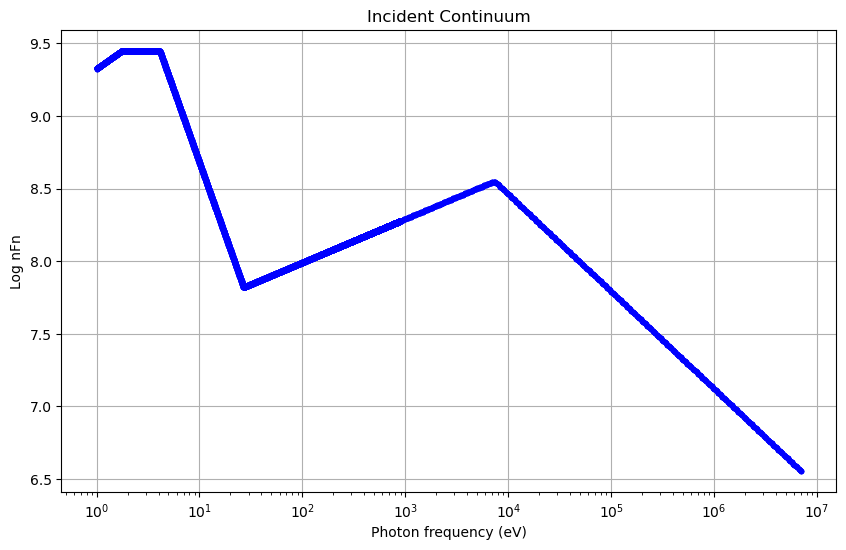

In [9]:
# Apply the conditions directly without modifying original arrays
mask = (en_inci > 1) & (nFn_inci > 1)

# Filtered arrays
filtered_en_inci = en_inci[mask]
filtered_nFn_inci = nFn_inci[mask]

# Take log of the filtered nFn_inci values
nFn_inci_log = np.log10(filtered_nFn_inci)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_en_inci, nFn_inci_log, '.', label='Incident Continuum', color='blue')

plt.xlabel('Photon frequency (eV)')
plt.ylabel('Log nFn')
plt.title('Incident Continuum')

plt.grid(True)
plt.xscale('log')  
plt.savefig("inci_continuum.png", format="png", dpi=300)
plt.show()

In [10]:
stat_trans = np.loadtxt('inci.cont',
                        skiprows=9, usecols=(0,1))

trans_en = stat_trans[:,0]
trans_nFn = stat_trans[:,1]


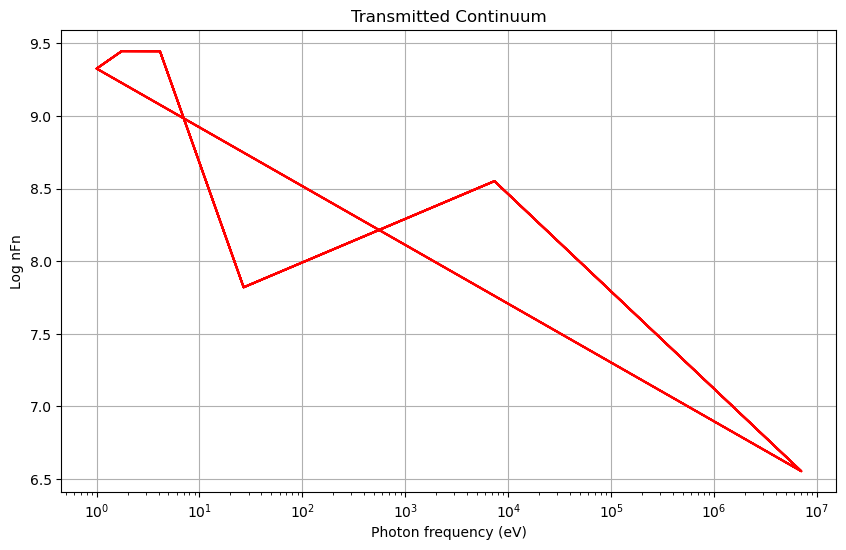

In [11]:
# Apply the mask to exclude values equal to 1
mask_trans = (trans_en > 1) & (trans_nFn > 1)

# Filtered arrays
filtered_trans_en = trans_en[mask_trans]
filtered_trans_nFn = trans_nFn[mask_trans]

# Take log of the filtered trans_nFn values
trans_nFn_log = np.log10(filtered_trans_nFn)

# Plot the transmitted continuum
plt.figure(figsize=(10, 6))
plt.plot(filtered_trans_en, trans_nFn_log, '-', label='Transmitted Continuum', color='red')

plt.xlabel('Photon frequency (eV)')
plt.ylabel('Log nFn')
plt.title('Transmitted Continuum')

plt.grid(True)
plt.xscale('log')
plt.savefig("trans_continuum_hden11.png", format="png", dpi=300)
plt.show()

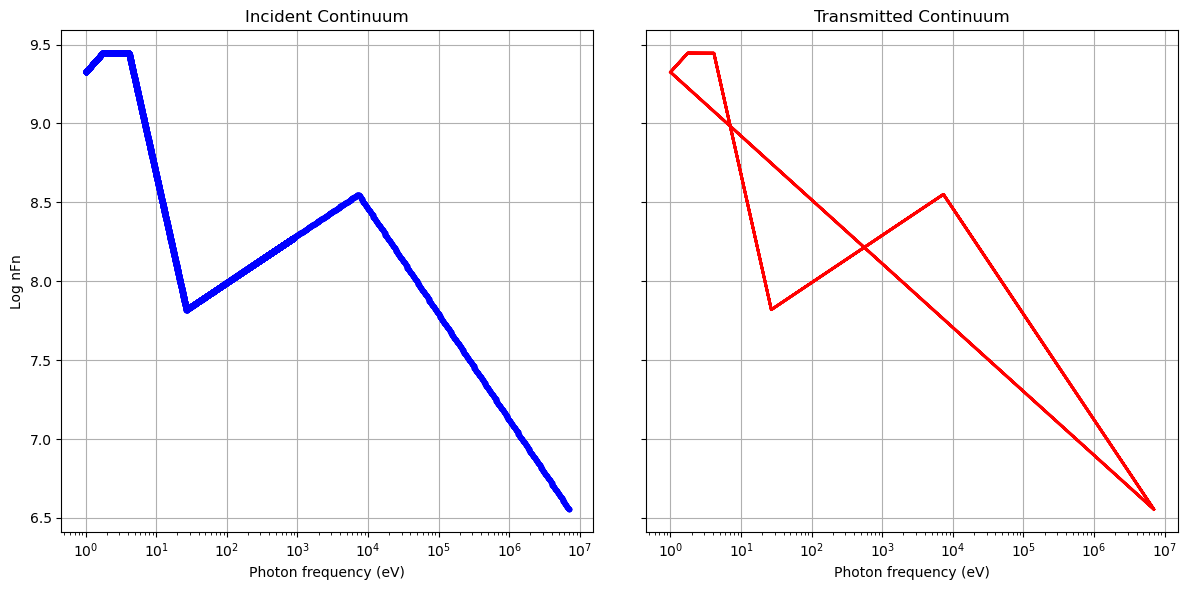

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot Incident Continuum
ax1.plot(filtered_en_inci, nFn_inci_log,'.', color='blue', linewidth=2)
ax1.set_title("Incident Continuum")
ax1.set_xlabel("Photon frequency (eV)")
ax1.set_xscale('log')
ax1.set_ylabel("Log nFn")
ax1.grid()

# Plot Transmitted Continuum
ax2.plot(filtered_trans_en, trans_nFn_log, color='red', linewidth=2)
ax2.set_title("Transmitted Continuum")
ax2.set_xlabel("Photon frequency (eV)")
ax2.set_xscale('log')
ax2.grid()


# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("continuum_plot.png", format="png", dpi=300)
plt.show()

# 3) Line flux over hden

In [13]:
line_flux = np.loadtxt('output.txt', usecols=(2, 3, 4, 11))

line_flux_C_IV = line_flux[:,0]
line_flux_H_beta = line_flux[:,1]
line_flux_H_alfa = line_flux[:,2]
line_flux_C_III = line_flux[:,3]

x = np.linspace(7.0, 14.0, 8)

In [14]:
for i in range(len(line_flux_C_IV)):
    if line_flux_C_IV[i] < 1:
        line_flux_C_IV[i] = 1
        
    else:
        line_flux_C_IV[i] = line_flux_C_IV[i]
        
    if line_flux_C_III[i] < 1:
        line_flux_C_III[i] = 1
    
    else:
        line_flux_C_III[i] = line_flux_C_III[i]

print(line_flux_C_III)

[1.0000e+00 1.0000e+00 3.4674e+03 1.1124e+08 9.9511e+06 1.4276e+06
 4.9745e+04 8.7091e+02]


In [15]:
C_IV_log = np.log10(line_flux_C_IV)
H_beta_log = np.log10(line_flux_H_beta)
H_alfa_log = np.log10(line_flux_H_alfa)
C_III_log = np.log10(line_flux_C_III)

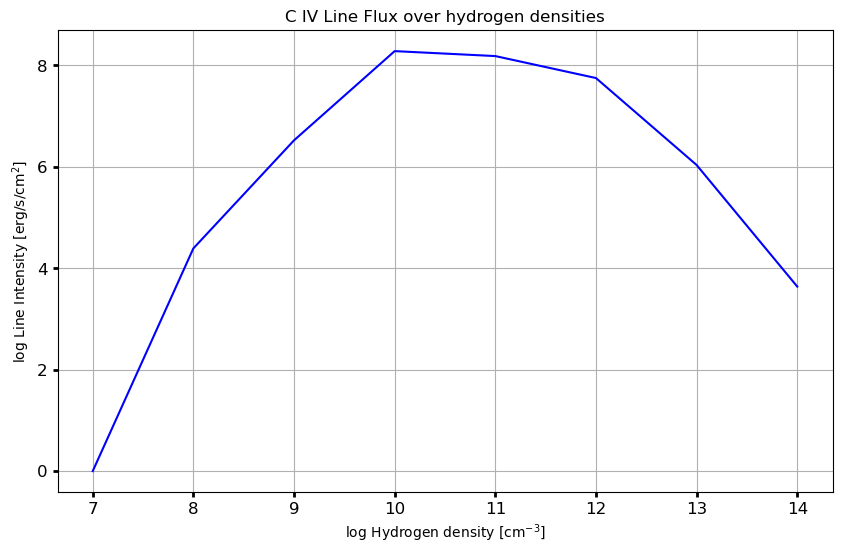

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x, C_IV_log, '-', color='b')
plt.xlabel('log Hydrogen density [cm$^{-3}$]')
plt.ylabel('log Line Intensity [erg/s/cm$^2$]')
plt.title('C IV Line Flux over hydrogen densities')
plt.grid(True)
plt.tick_params(axis='both', which='major', width=2, labelsize=12)  # Make ticks thicker and labels larger
plt.tick_params(axis='both', which='minor', width=1.5)  # Optional: adjust minor ticks if present
plt.savefig("CIV.png", format="png", dpi=300)
plt.show()

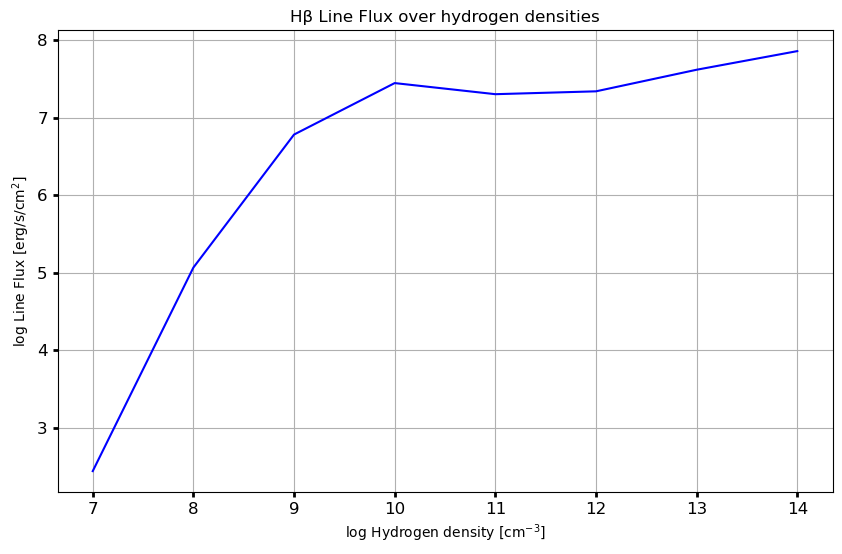

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x, H_beta_log, '-', color='b')
plt.xlabel('log Hydrogen density [cm$^{-3}$]')
plt.ylabel('log Line Flux [erg/s/cm$^2$]')
plt.title('Hβ Line Flux over hydrogen densities')
plt.grid(True)
plt.tick_params(axis='both', which='major', width=2, labelsize=12)  # Make ticks thicker and labels larger
plt.tick_params(axis='both', which='minor', width=1.5)  # Optional: adjust minor ticks if present
plt.savefig("Hbeta.png", format="png", dpi=300)
plt.show()

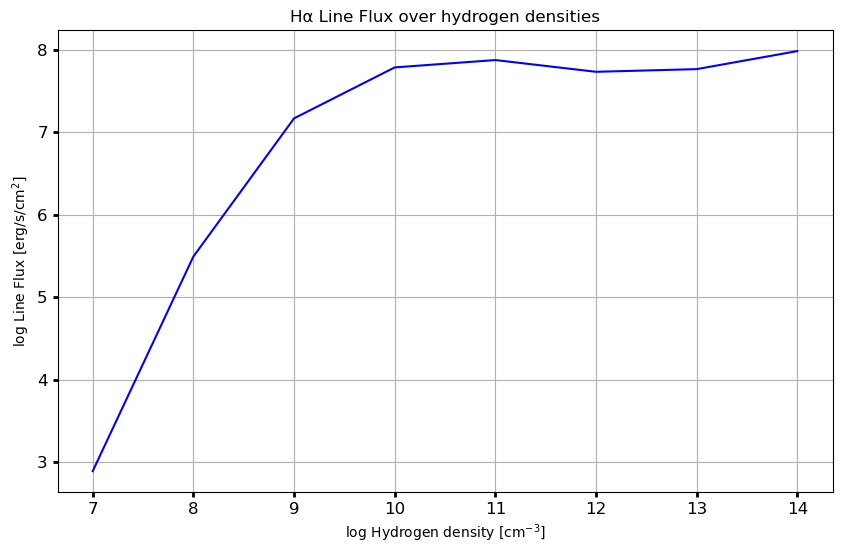

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, H_alfa_log, '-', color='b')
plt.xlabel('log Hydrogen density [cm$^{-3}$]')
plt.ylabel('log Line Flux [erg/s/cm$^2$]')
plt.title('Hα Line Flux over hydrogen densities')
plt.grid(True)
plt.tick_params(axis='both', which='major', width=2, labelsize=12)  # Make ticks thicker and labels larger
plt.tick_params(axis='both', which='minor', width=1.5)  # Optional: adjust minor ticks if present
plt.savefig("Halfa.png", format="png", dpi=300)
plt.show()

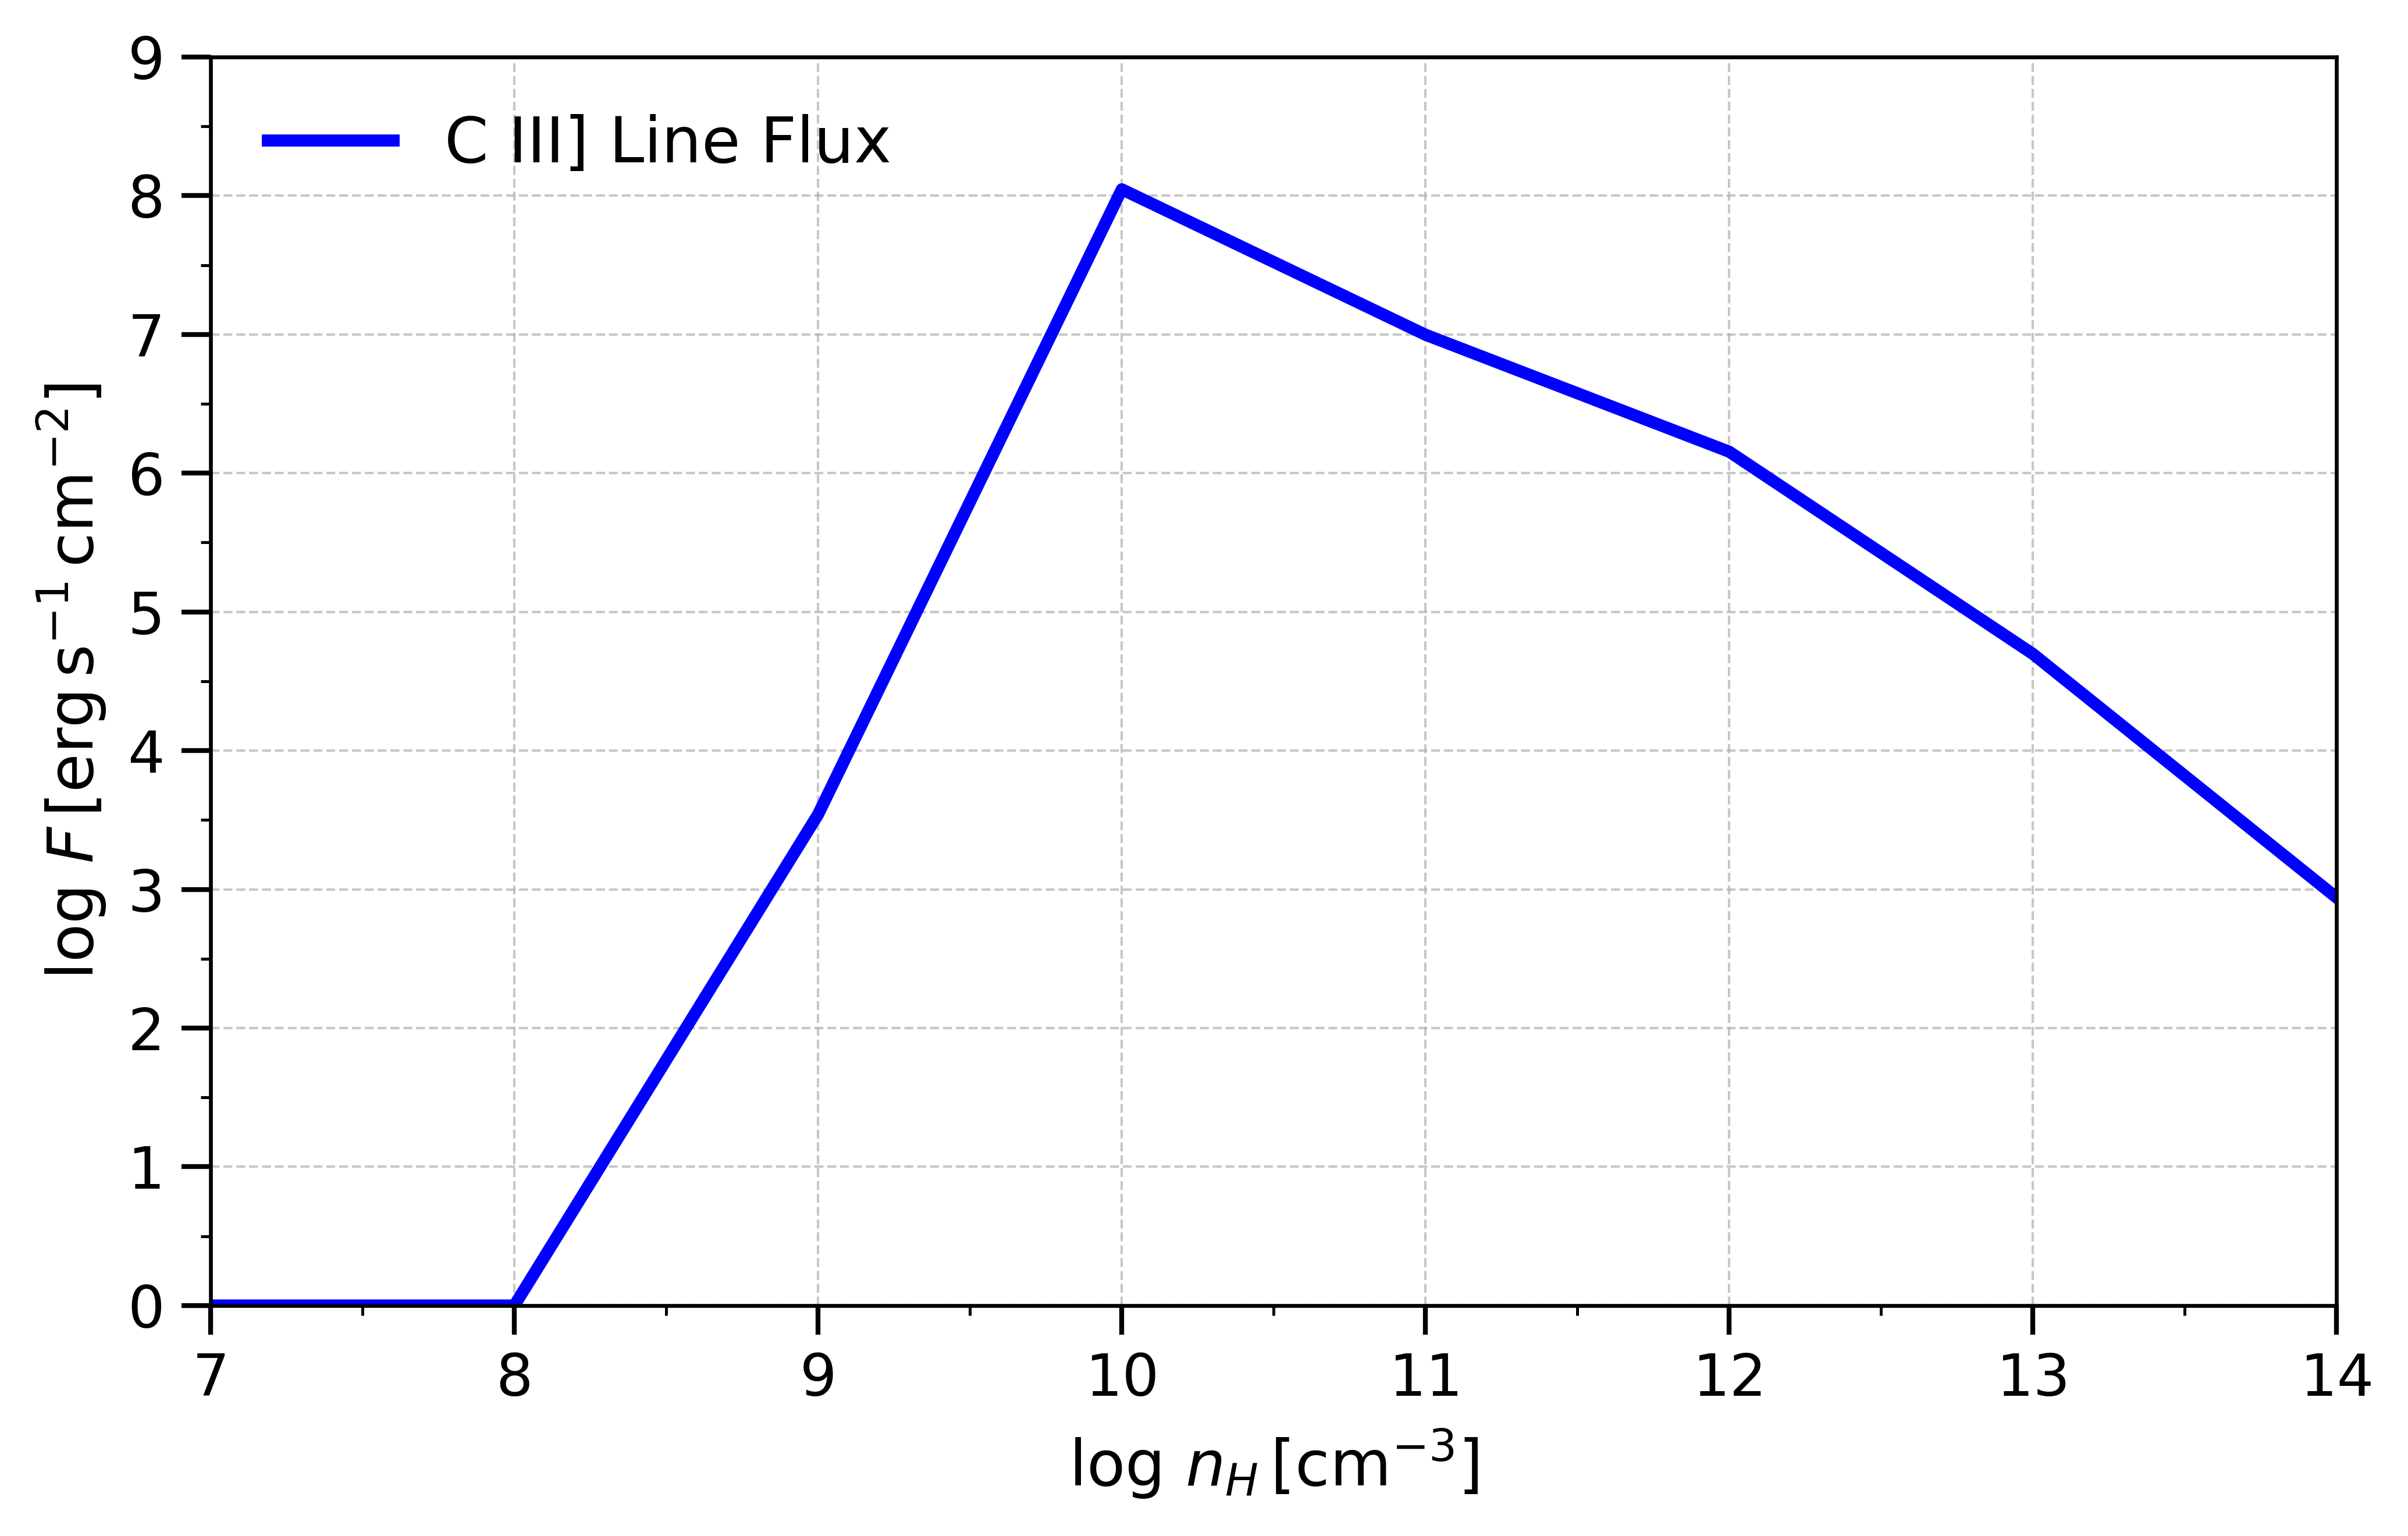

In [28]:
# Create figure with a more compact aspect ratio
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=600)  

# Plot with enhanced styling
ax.plot(x, C_III_log, linestyle='-', linewidth=2.5, color='b', label=r'$\mathrm{C\ III]}$ Line Flux')

# Labels with LaTeX formatting
ax.set_xlabel(r'$\log \, n_H \, [\mathrm{cm}^{-3}]$', fontsize=13)
ax.set_ylabel(r'$\log \, F \, [\mathrm{erg \, s^{-1} \, cm^{-2}}]$', fontsize=13)

# Grid styling: dashed, subtle
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust tick parameters for better readability
ax.tick_params(axis='both', which='major', width=1, length=6, labelsize=12)
#ax.tick_params(axis='both', which='minor', width=1.5, length=4)

# Add minor ticks with controlled intervals
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Set axis limits
ax.set_xlim(7, 14)
ax.set_ylim(0, 9)

# Improved legend placement (upper left, outside the plot if possible)
ax.legend(fontsize=13, loc='upper left', frameon=False)

# Adjust layout to avoid label cropping
plt.tight_layout()

# Save as high-quality PDF (vector format preferred for journals)
plt.savefig("CIII_flux_plot.pdf", format="pdf", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

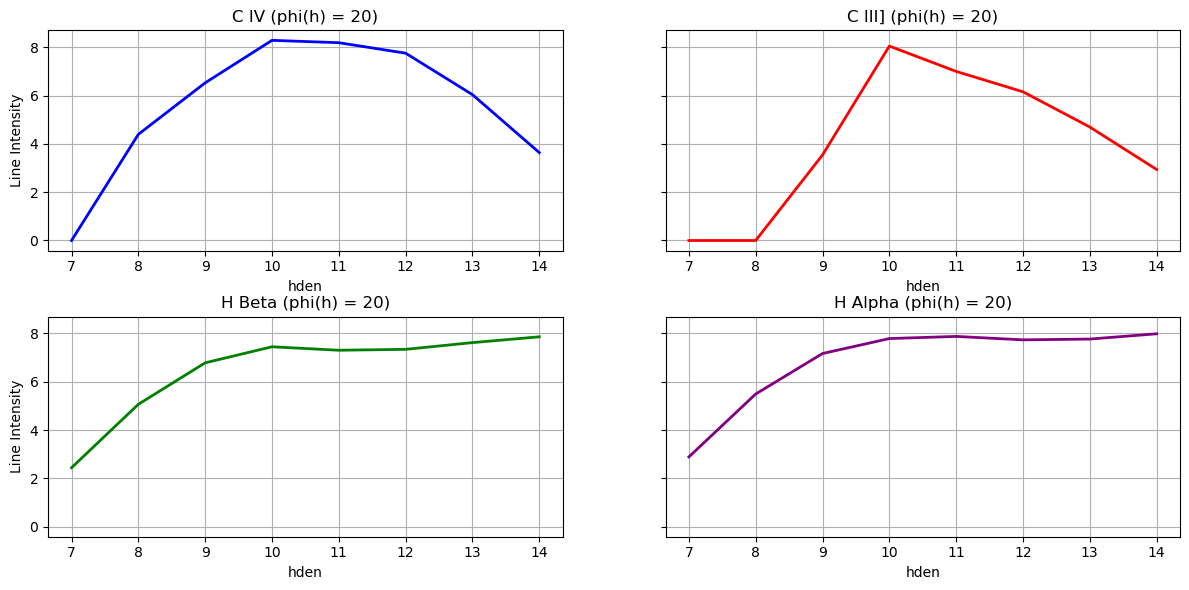

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharey=True)

# Unpack the axes
ax1, ax2, ax3, ax4 = axes.flatten()

# Plot Incident Continuum
ax1.plot(x, C_IV_log, '-', color='blue', linewidth=2)
ax1.set_title("C IV (phi(h) = 20)")
ax1.set_xlabel("hden")
ax1.set_ylabel("Line Intensity")
ax1.grid()

# Plot Transmitted Continuum for C III
ax2.plot(x, C_III_log, '-', color='red', linewidth=2)
ax2.set_title("C III] (phi(h) = 20)")
ax2.set_xlabel("hden")
ax2.grid()

# Plot Transmitted Continuum for H Beta
ax3.plot(x, H_beta_log, '-', color='green', linewidth=2)
ax3.set_title("H Beta (phi(h) = 20)")
ax3.set_xlabel("hden")
ax3.set_ylabel("Line Intensity")
ax3.grid()


# Plot Transmitted Continuum for H Alpha
ax4.plot(x, H_alfa_log, '-', color='purple', linewidth=2)
ax4.set_title("H Alpha (phi(h) = 20)")
ax4.set_xlabel("hden")
ax4.grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

# 4) Line flux over depth

In [21]:
line_flux_c = np.loadtxt('lines.cum')

depth = line_flux_c[:,0]
line_fluxc_C_IV = line_flux_c[:,1]
line_fluxc_H_beta = line_flux_c[:,2]
line_fluxc_H_alfa = line_flux_c[:,3]
line_fluxc_C_III = line_flux_c[:,4]


In [22]:
print(depth)

[1.61869e+14 8.07551e+14 1.72680e+15 ... 9.95977e+08 9.97290e+08
 9.97604e+08]


In [23]:
for i in range(len(line_fluxc_C_IV)):
    if line_fluxc_C_IV[i] < 1:
        line_fluxc_C_IV[i] = 1
        
    else:
        line_fluxc_C_IV[i] = line_fluxc_C_IV[i]
        
    if line_fluxc_C_III[i] < 1:
        line_fluxc_C_III[i] = 1
    
    else:
        line_fluxc_C_III[i] = line_fluxc_C_III[i]

print(line_fluxc_C_IV)

[1.0000e+00 1.0000e+00 1.0000e+00 ... 4.3564e+03 4.3564e+03 4.3564e+03]


In [24]:
C_IV_logc = np.log10(line_fluxc_C_IV)
H_beta_logc = np.log10(line_fluxc_H_beta)
H_alfa_logc = np.log10(line_fluxc_H_alfa)
C_III_logc = np.log10(line_fluxc_C_III)

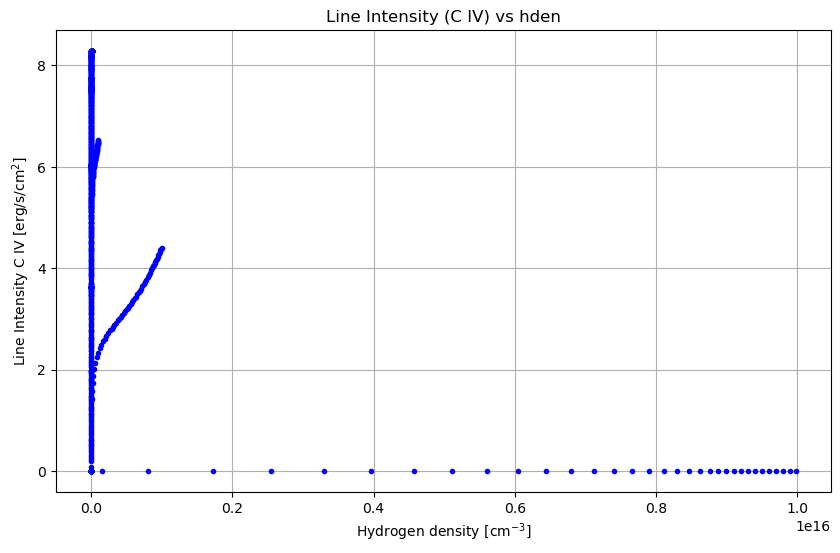

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(depth, C_IV_logc, '.', color='b')
plt.xlabel('Hydrogen density [cm$^{-3}$]')
plt.ylabel('Line Intensity C IV [erg/s/cm$^2$]')
plt.title('Line Intensity (C IV) vs hden')
plt.grid(True)
plt.show()